In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

### Nace Codes

These are the right NACE Codes for our test reports. Note that usually multiple codes are right!

In [2]:
NACE_codes = {
    "adidas-ar23.csv": "C",
    "bayer-annual-report-2023-2.csv": "C",
    "conti_annual-report-2023-data.csv": "C",
    "Deutsche_Annual-Report-2023.csv": "K",
    "heidelberg-materials_2023.csv": "B",
    "mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv": "G",
    "rheinmetall-ag_2023.csv": "C",
    "Siemens-Annual-Report-2023.csv": "C",
    "thyssenkrupp-GB_2023-2024_EN_WEB.csv": "C",
    "Zalando-SE_DE_241203_s.csv": "C"
}

### Load Sentence Similarities

In [3]:
paragraph_similarities = glob.glob("paragraph_similarities/*.csv")
paragraph_similarities

['paragraph_similarities/rheinmetall-ag_2023.csv',
 'paragraph_similarities/conti_annual-report-2023-data.csv',
 'paragraph_similarities/heidelberg-materials_2023.csv',
 'paragraph_similarities/Siemens-Annual-Report-2023.csv',
 'paragraph_similarities/thyssenkrupp-GB_2023-2024_EN_WEB.csv',
 'paragraph_similarities/Zalando-SE_DE_241203_s.csv',
 'paragraph_similarities/Deutsche_Annual-Report-2023.csv',
 'paragraph_similarities/bayer-annual-report-2023-2.csv',
 'paragraph_similarities/adidas-ar23.csv',
 'paragraph_similarities/mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv']

In [4]:
df_paragraph_similarities = [[os.path.basename(file).split(".")[0], pd.read_csv(file)] for file in paragraph_similarities]

##### Filter out only $cos(\theta)$ > 0.5

In [5]:
cos_threshold = 0.4

### Visualize mean scores

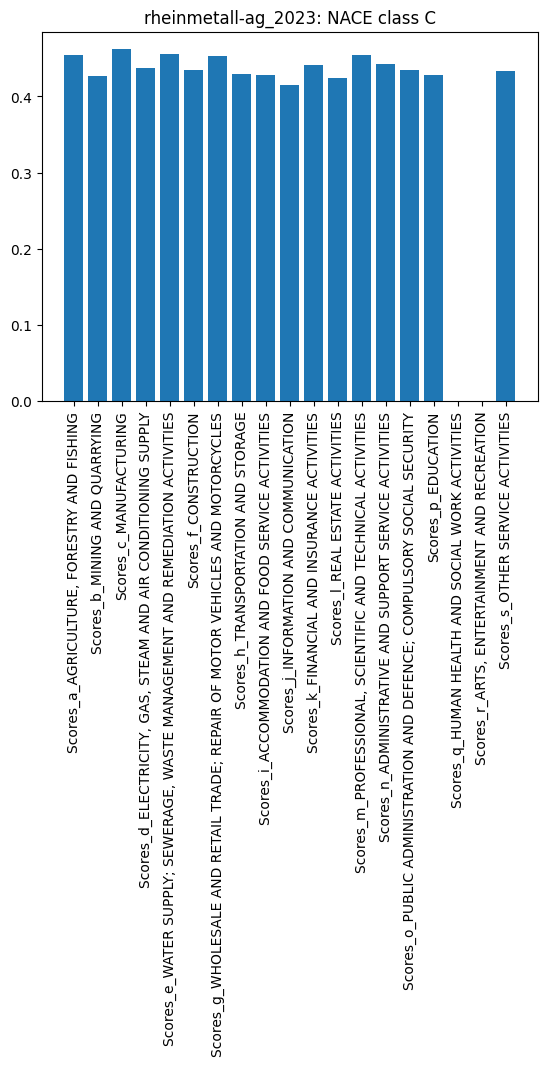

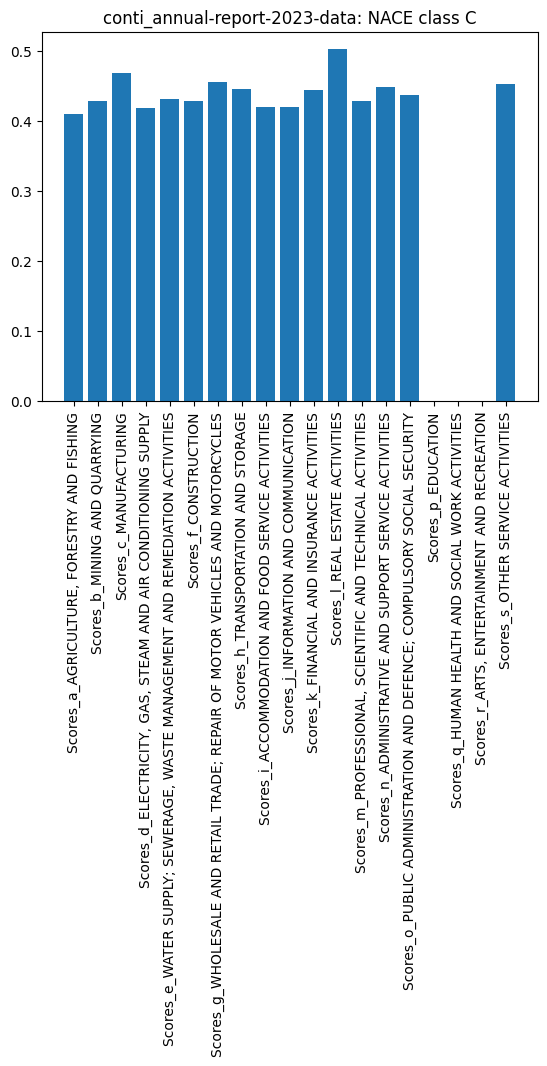

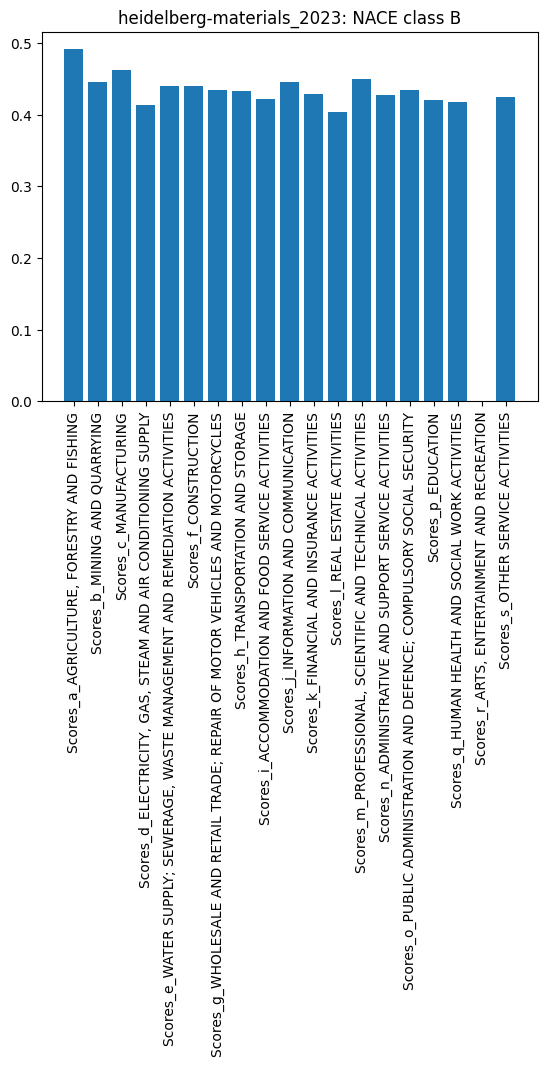

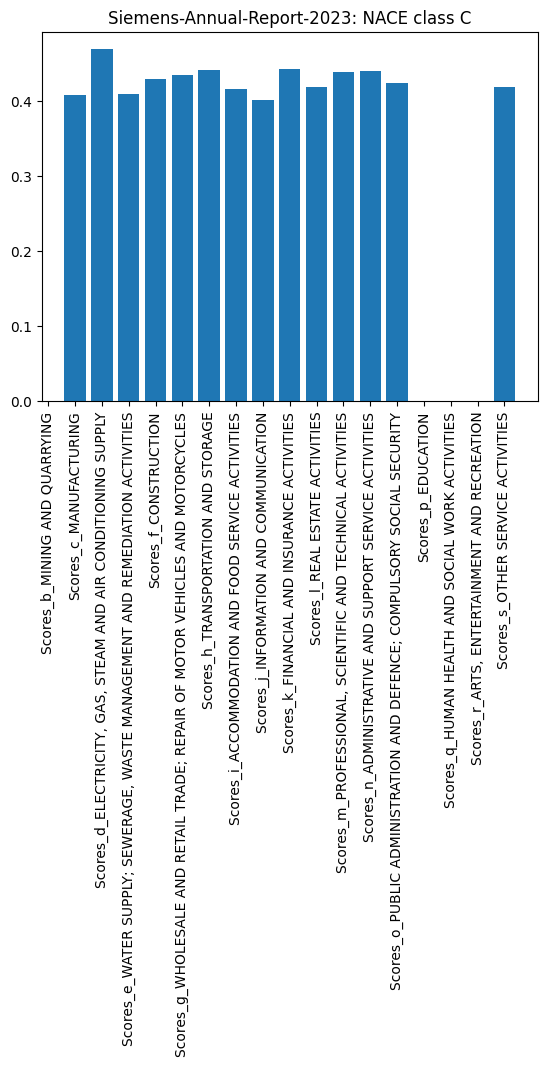

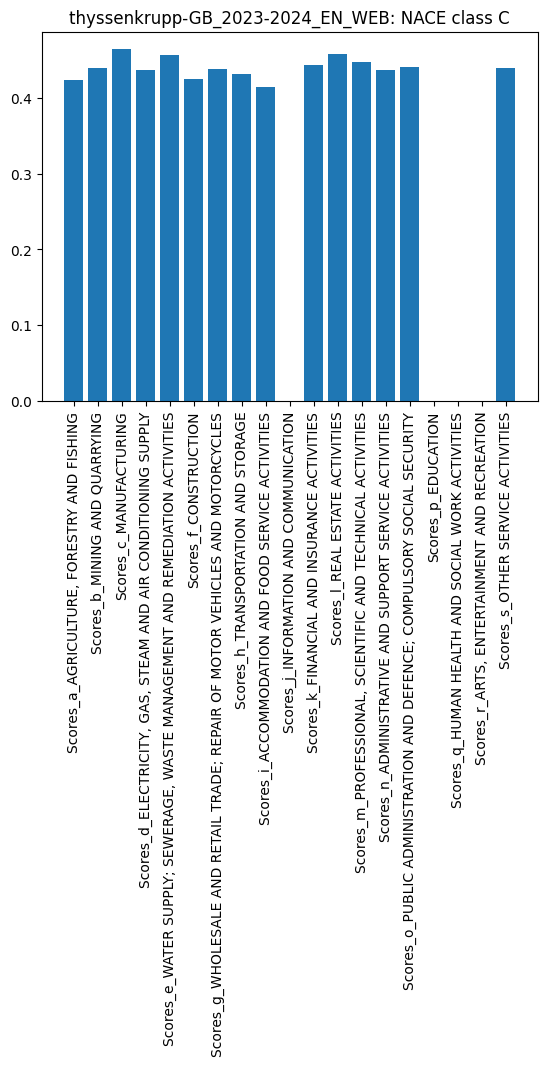

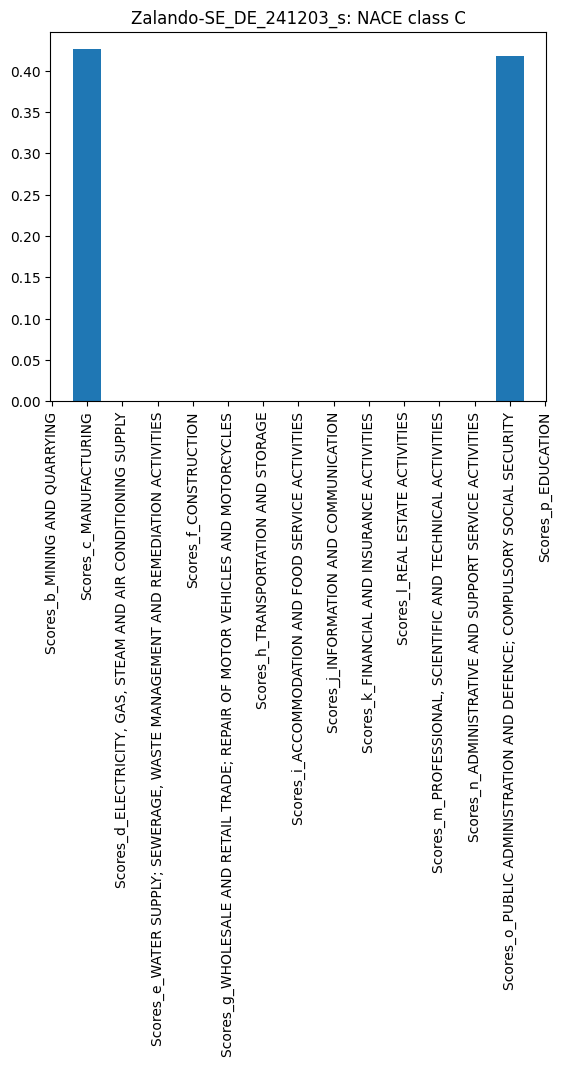

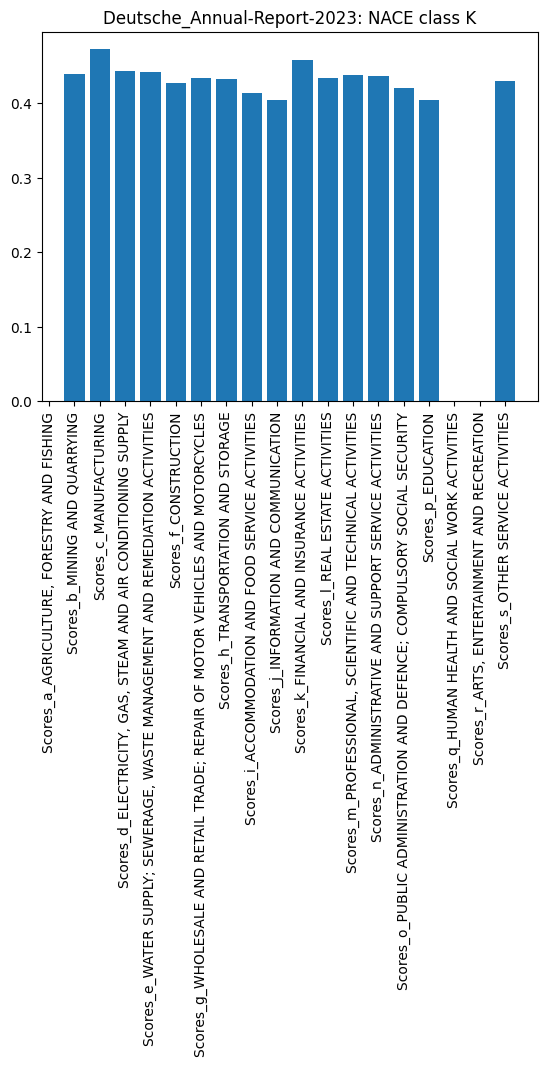

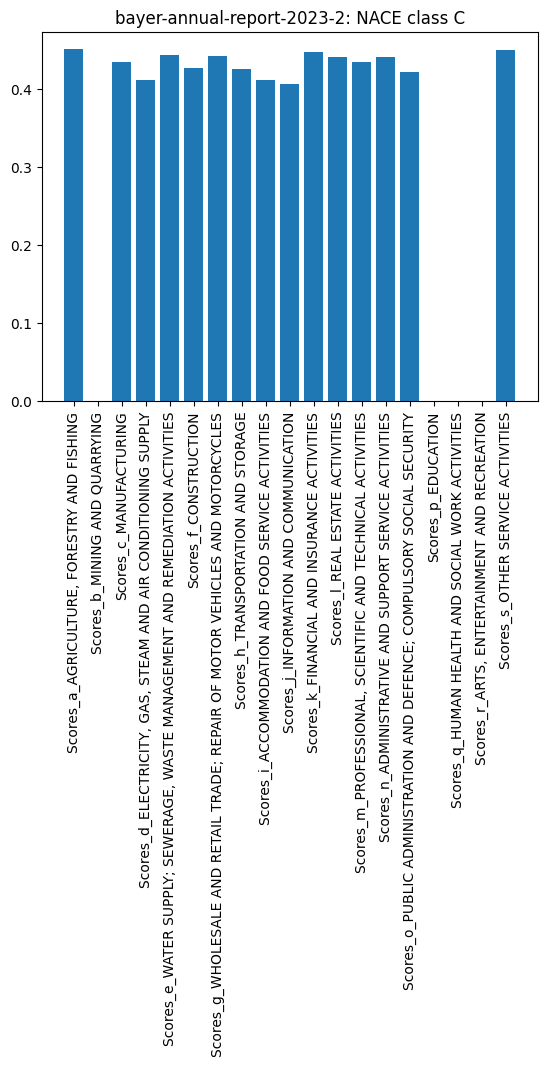

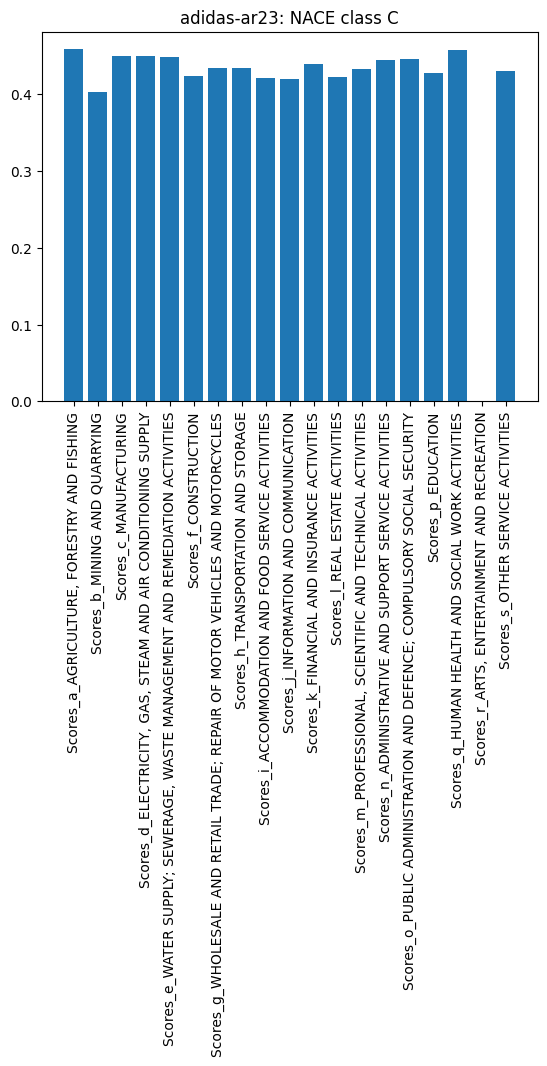

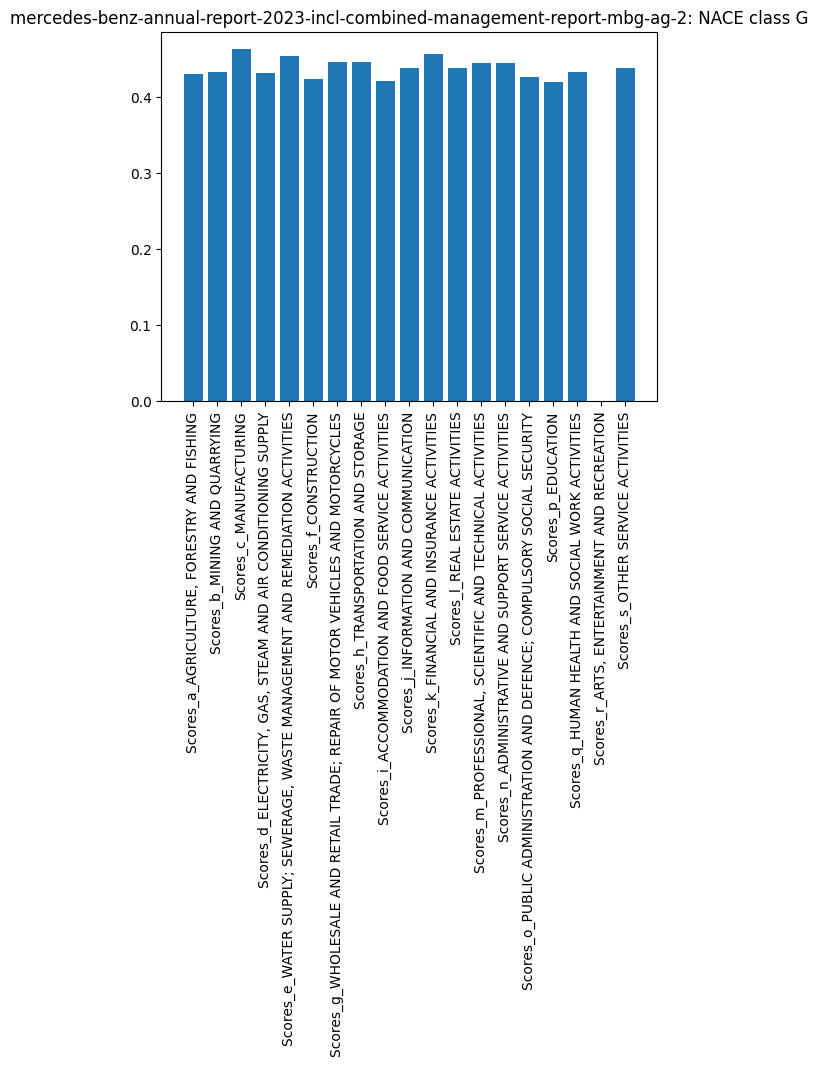

In [6]:
for i in range(len(df_paragraph_similarities)):
    
    plt.bar(df_paragraph_similarities[i][1].iloc[:,3:].columns, df_paragraph_similarities[i][1].iloc[:, 3:][df_paragraph_similarities[i][1].iloc[:, 3:] > cos_threshold].mean())
    plt.xticks(rotation=90)
    plt.title(f"{os.path.basename(df_paragraph_similarities[i][0])}: NACE class {NACE_codes[df_paragraph_similarities[i][0]+'.csv']}")
    plt.show()

### Visualize distributions

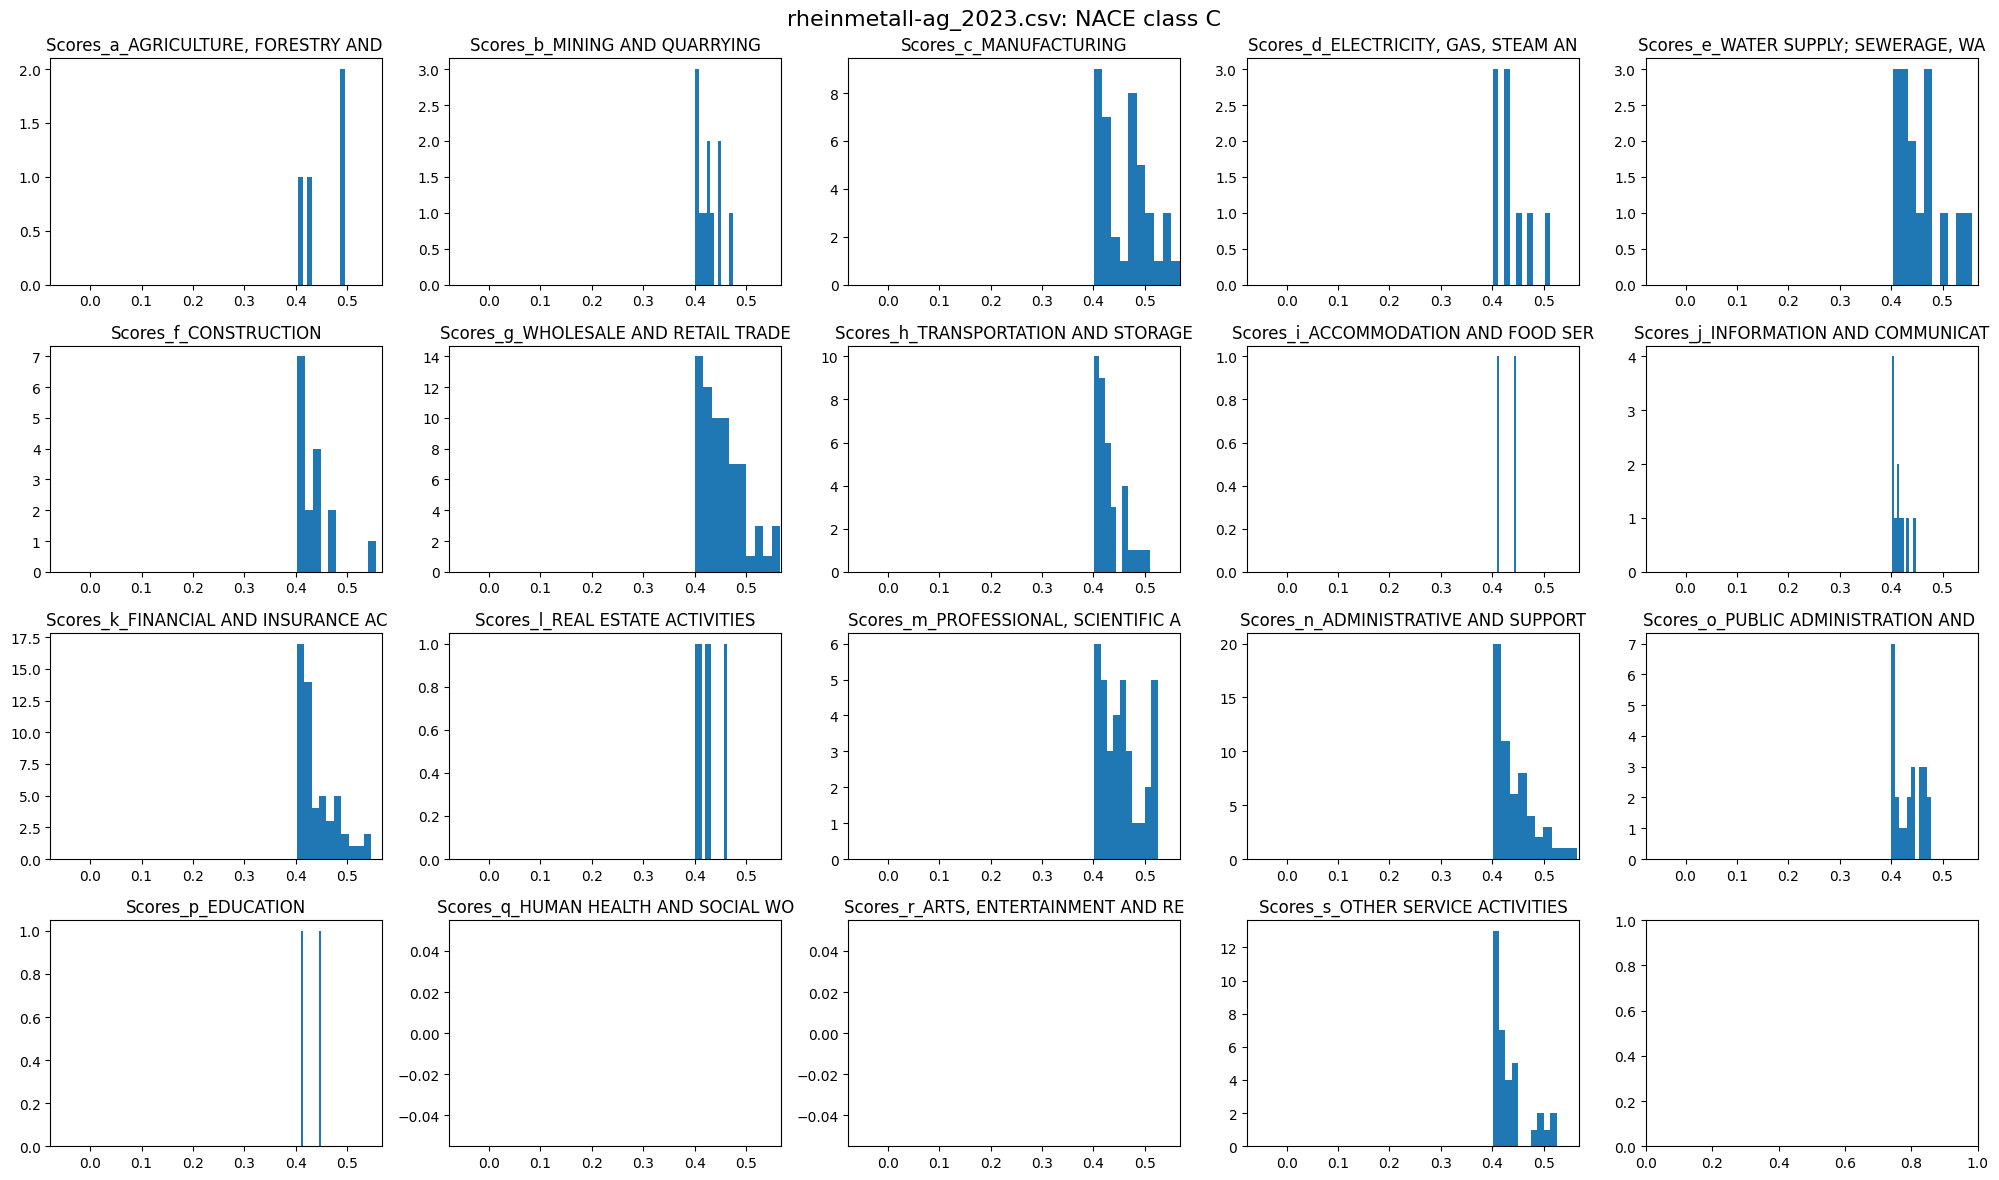

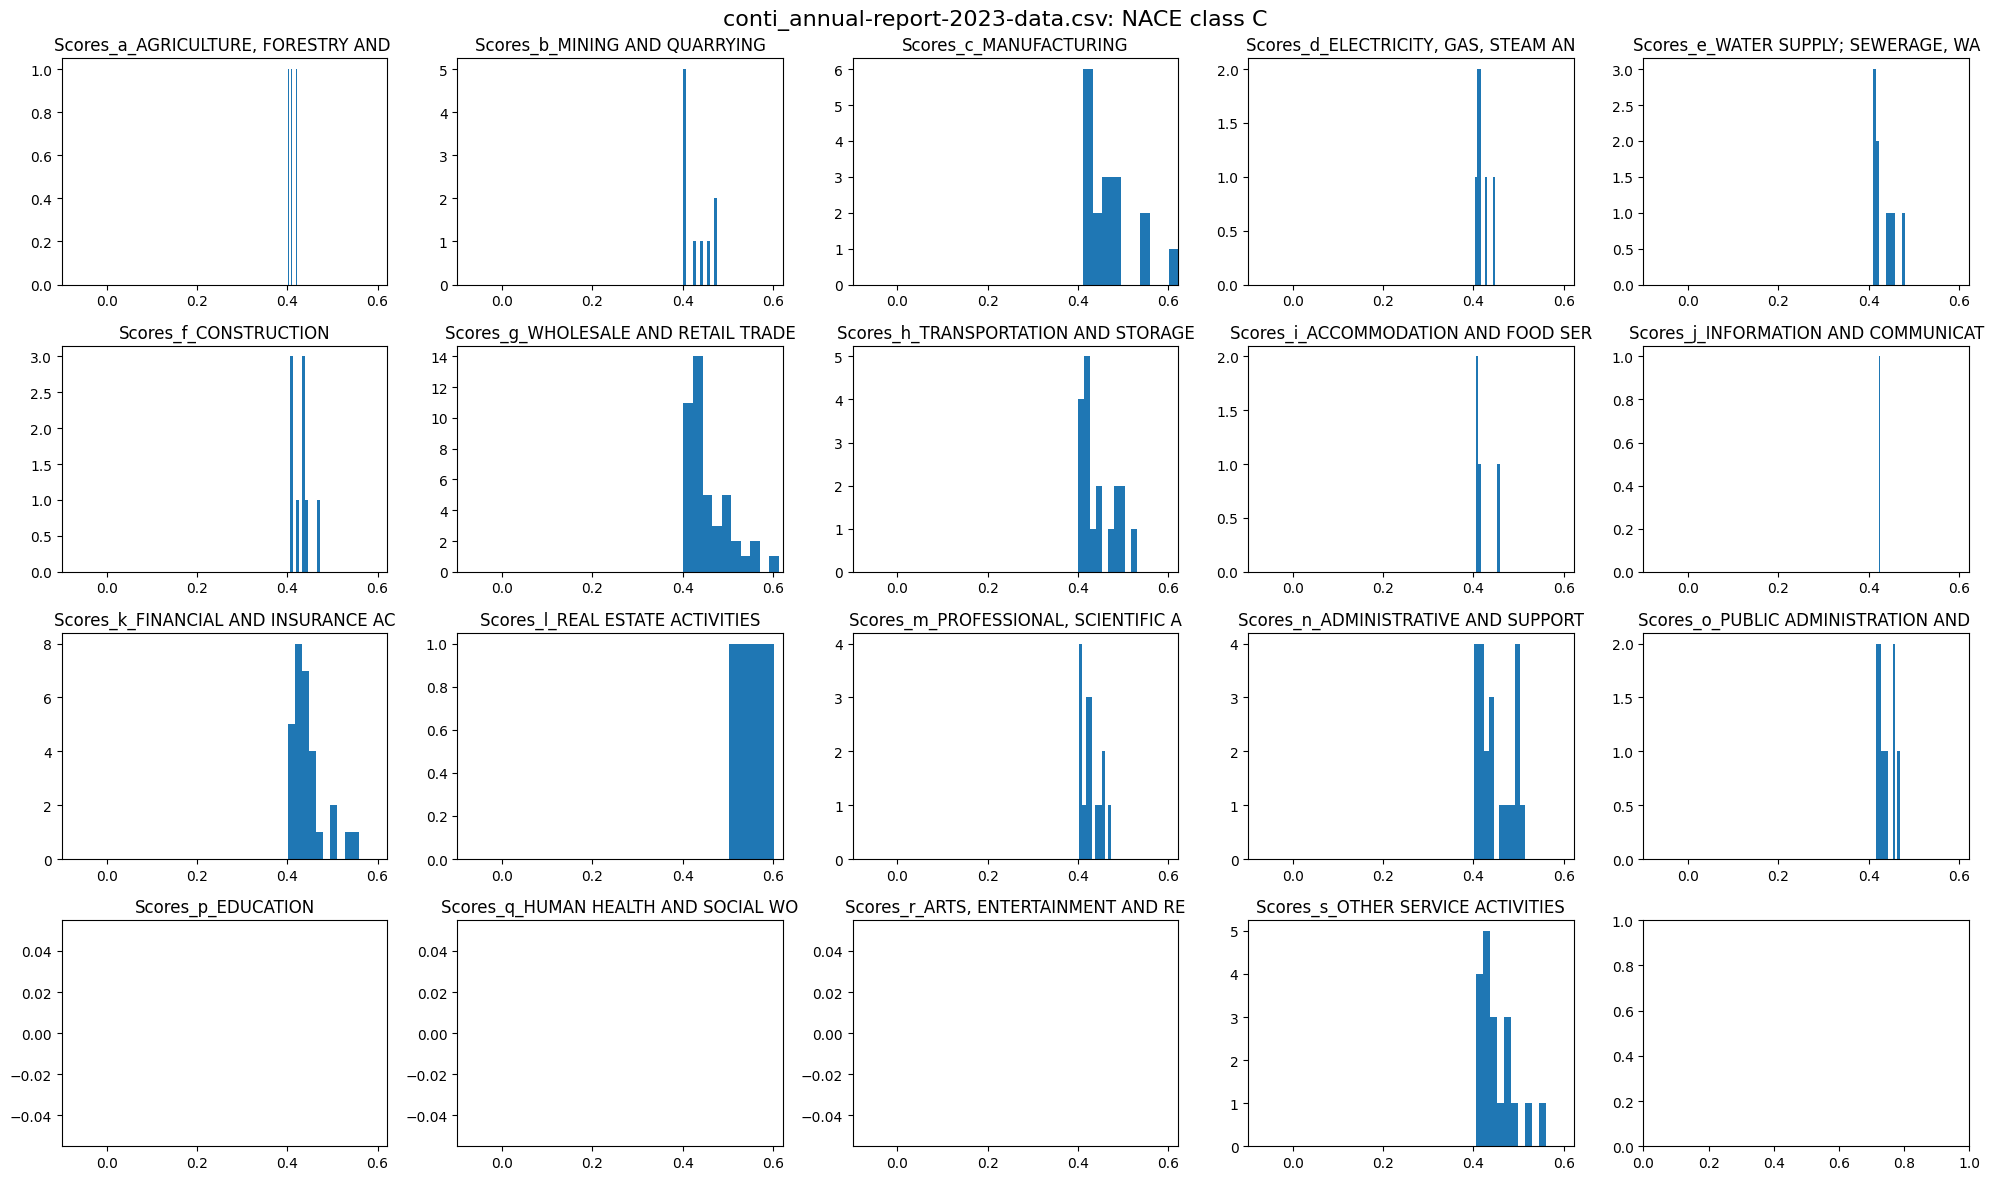

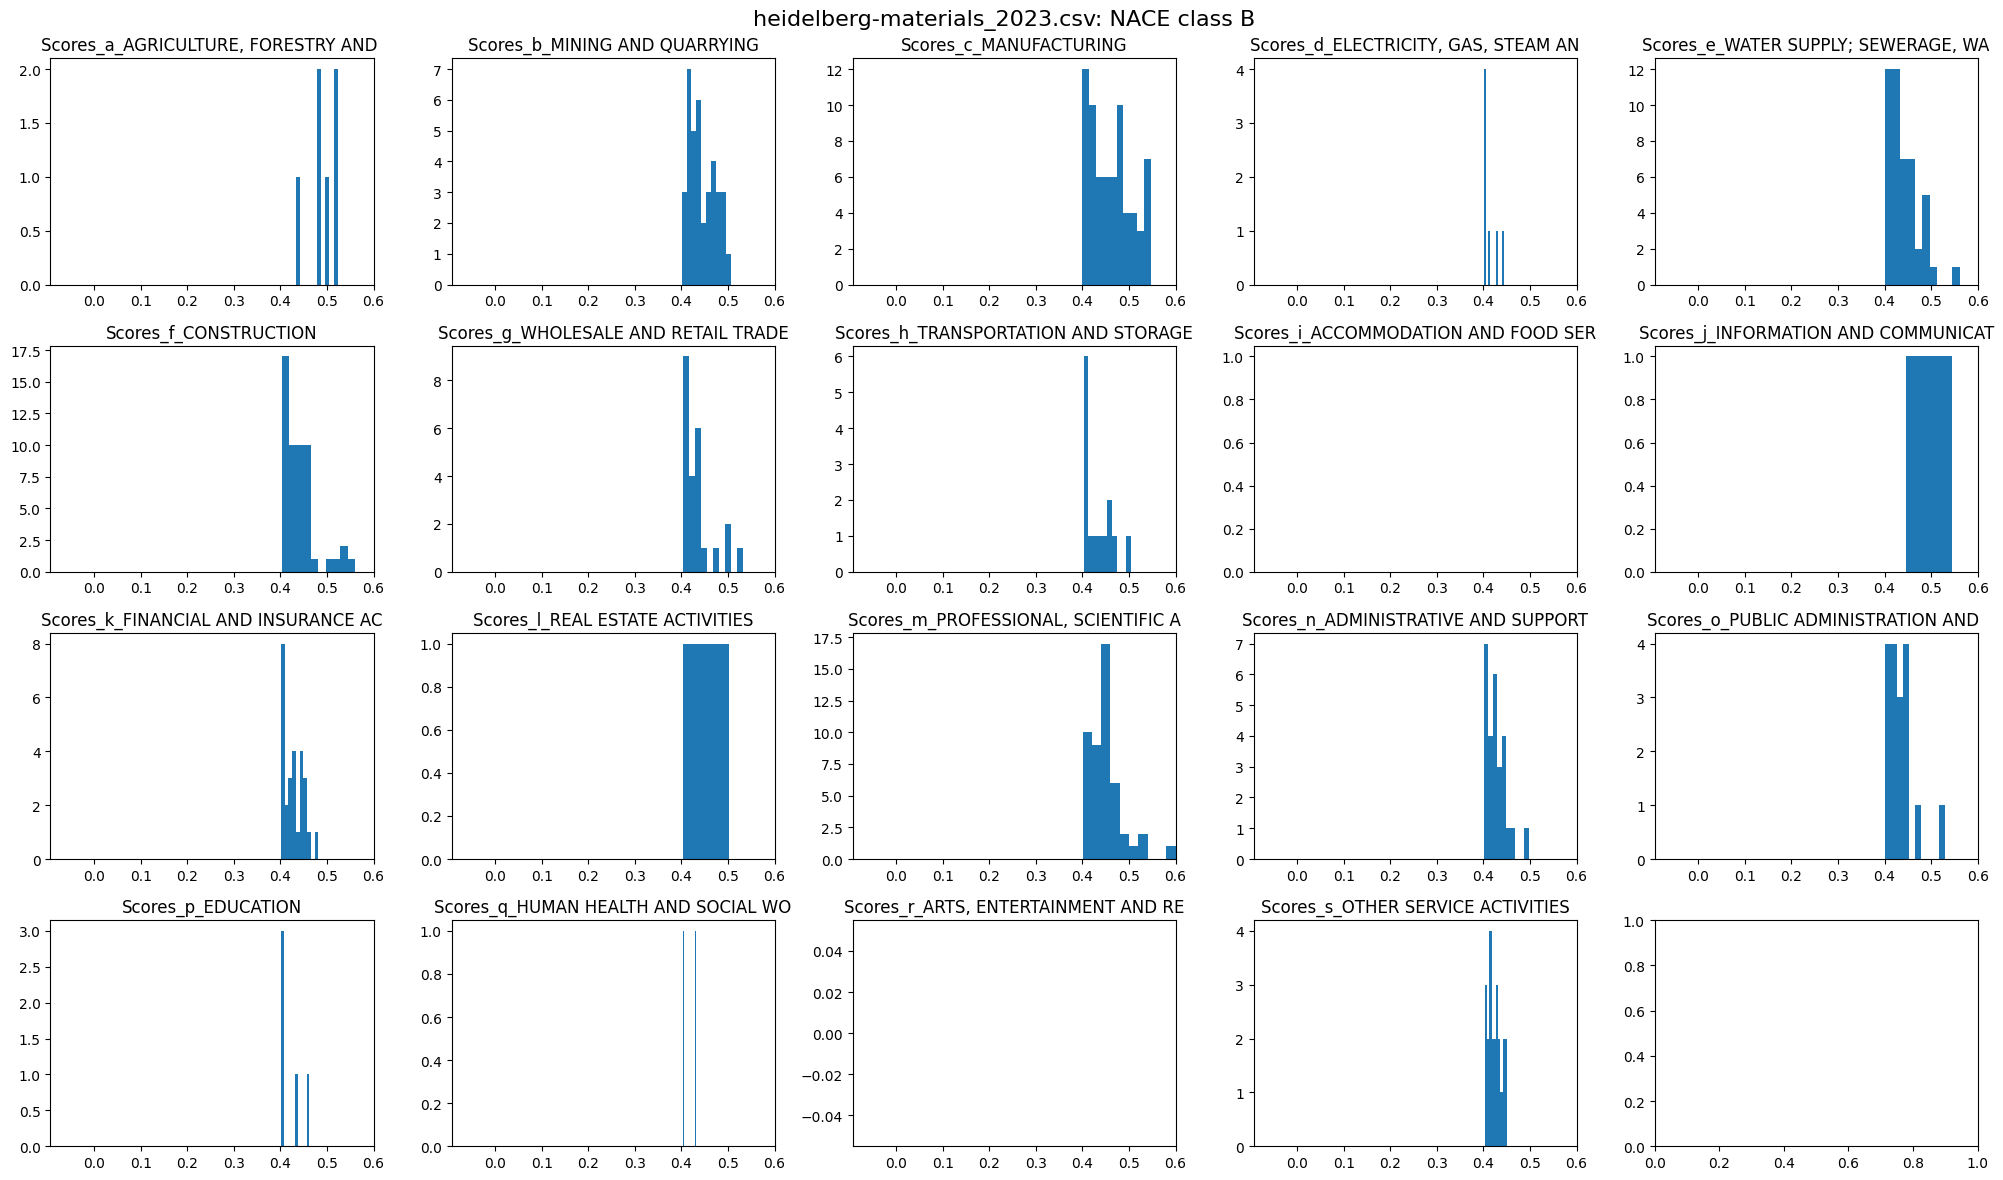

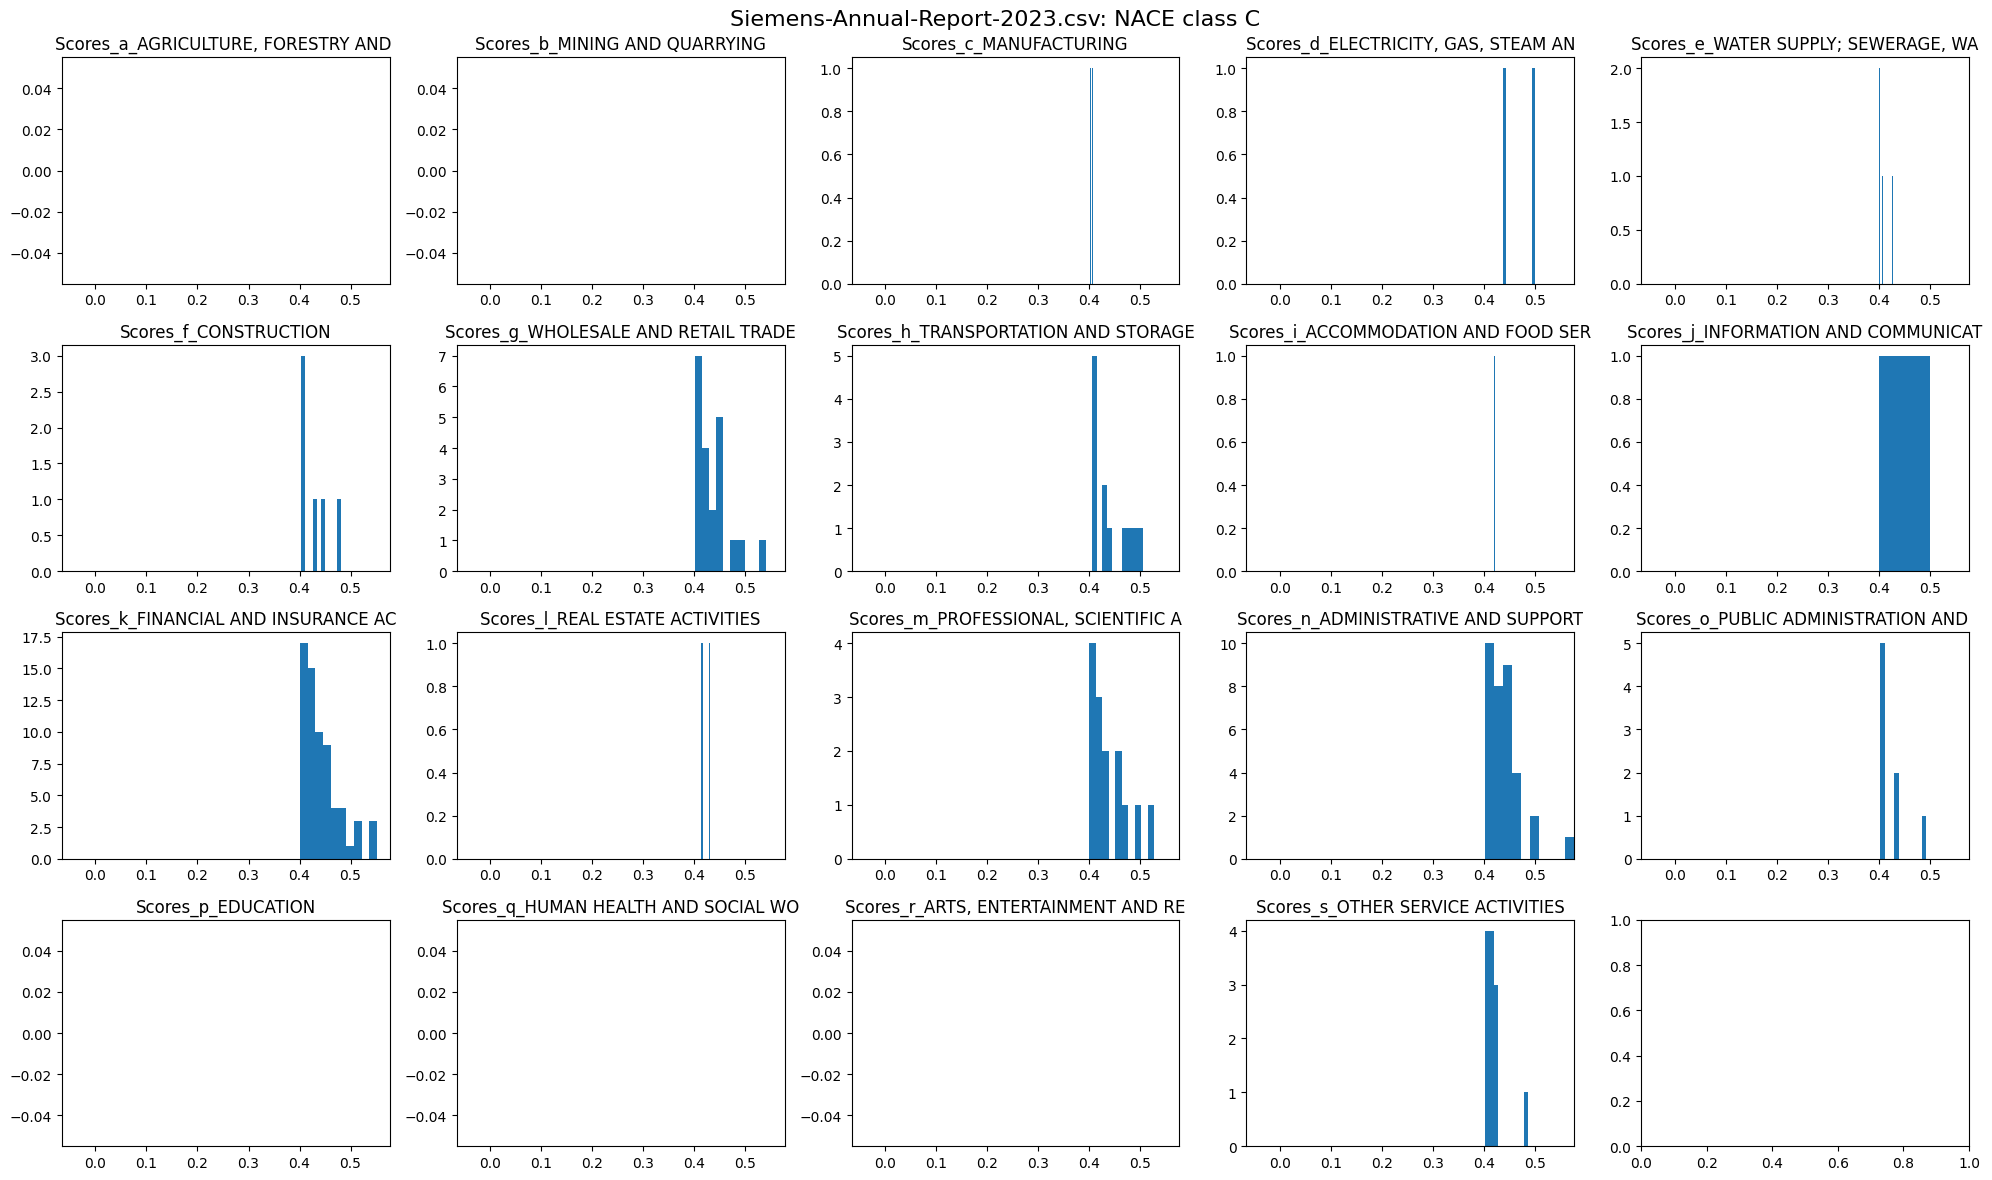

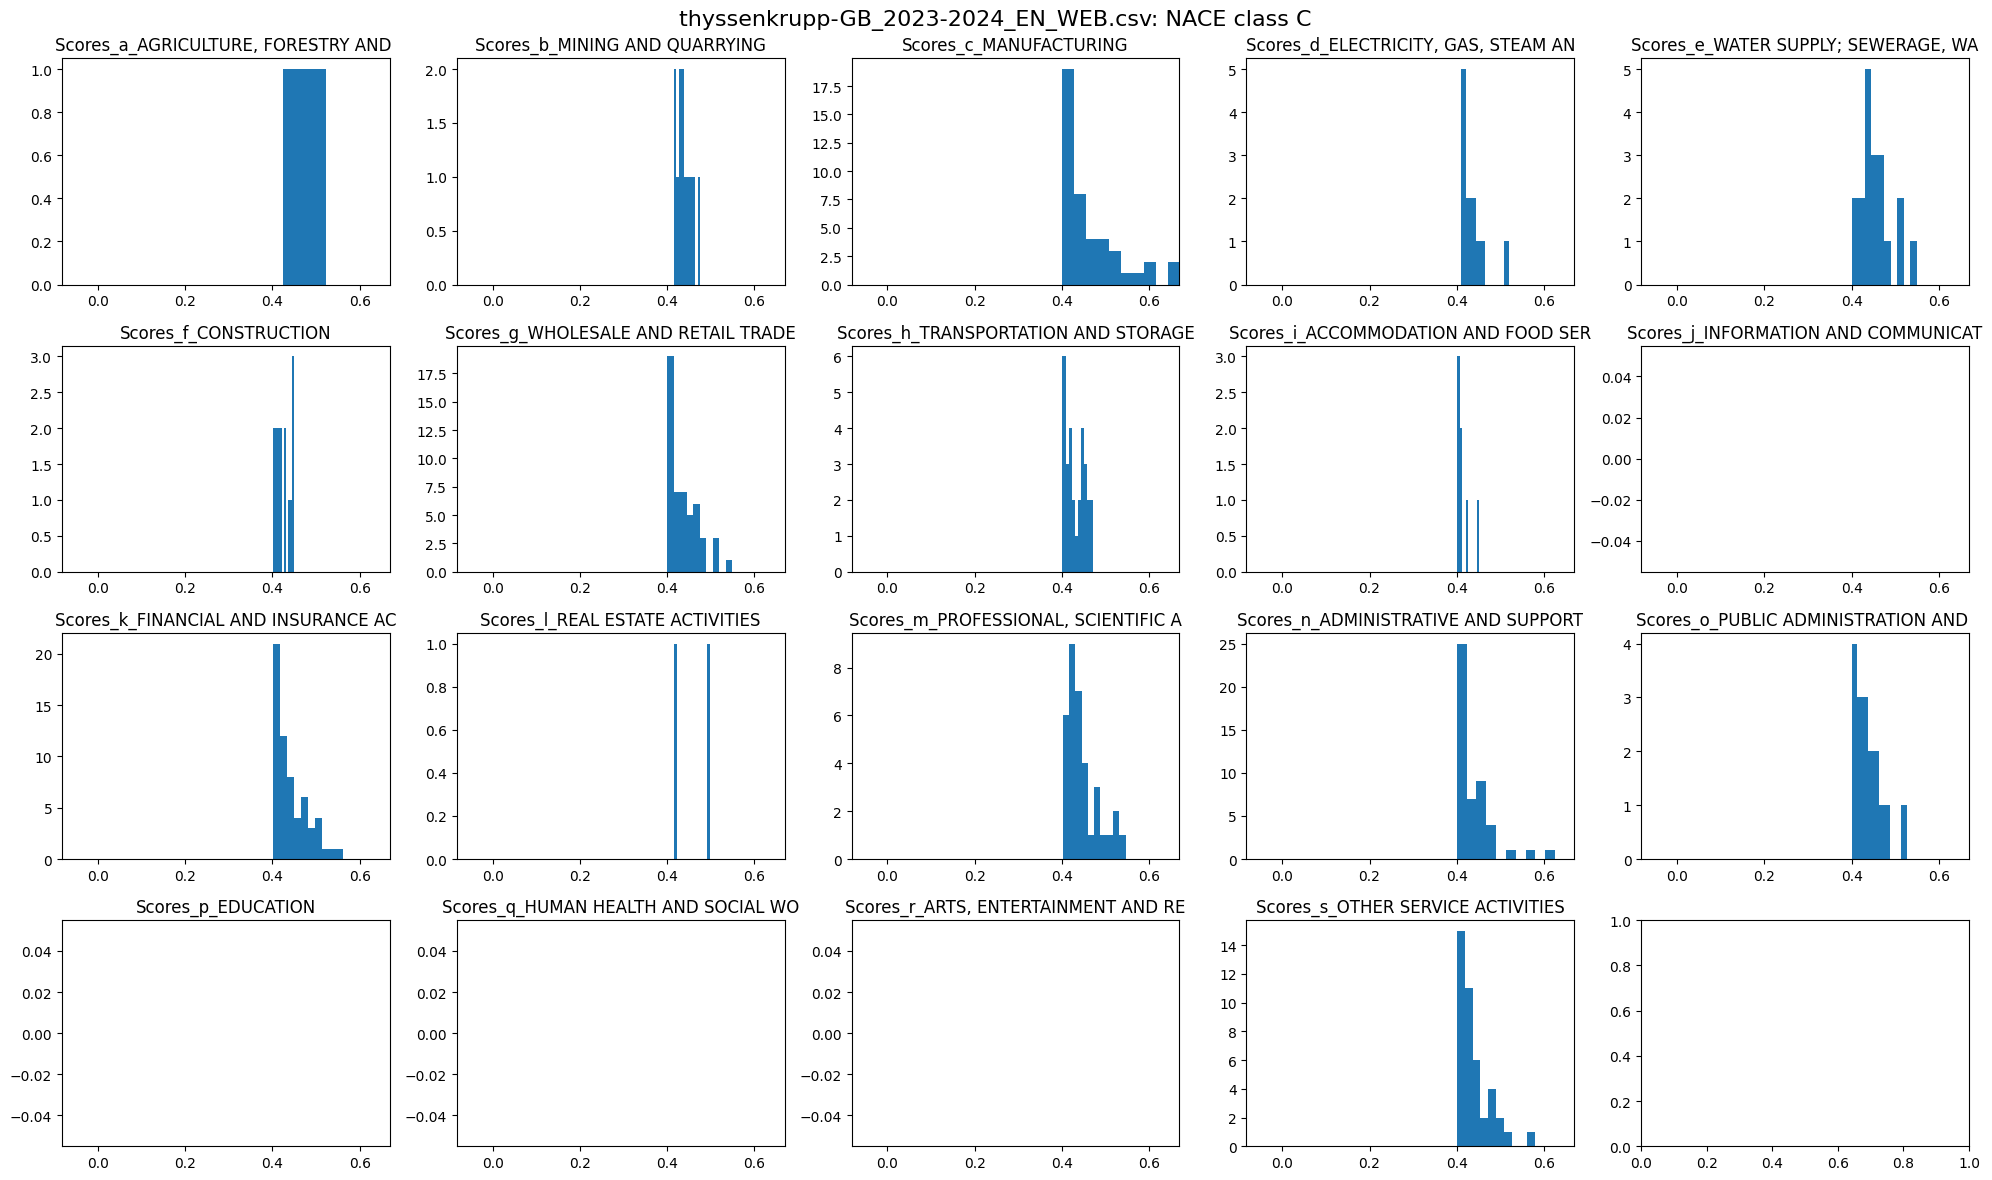

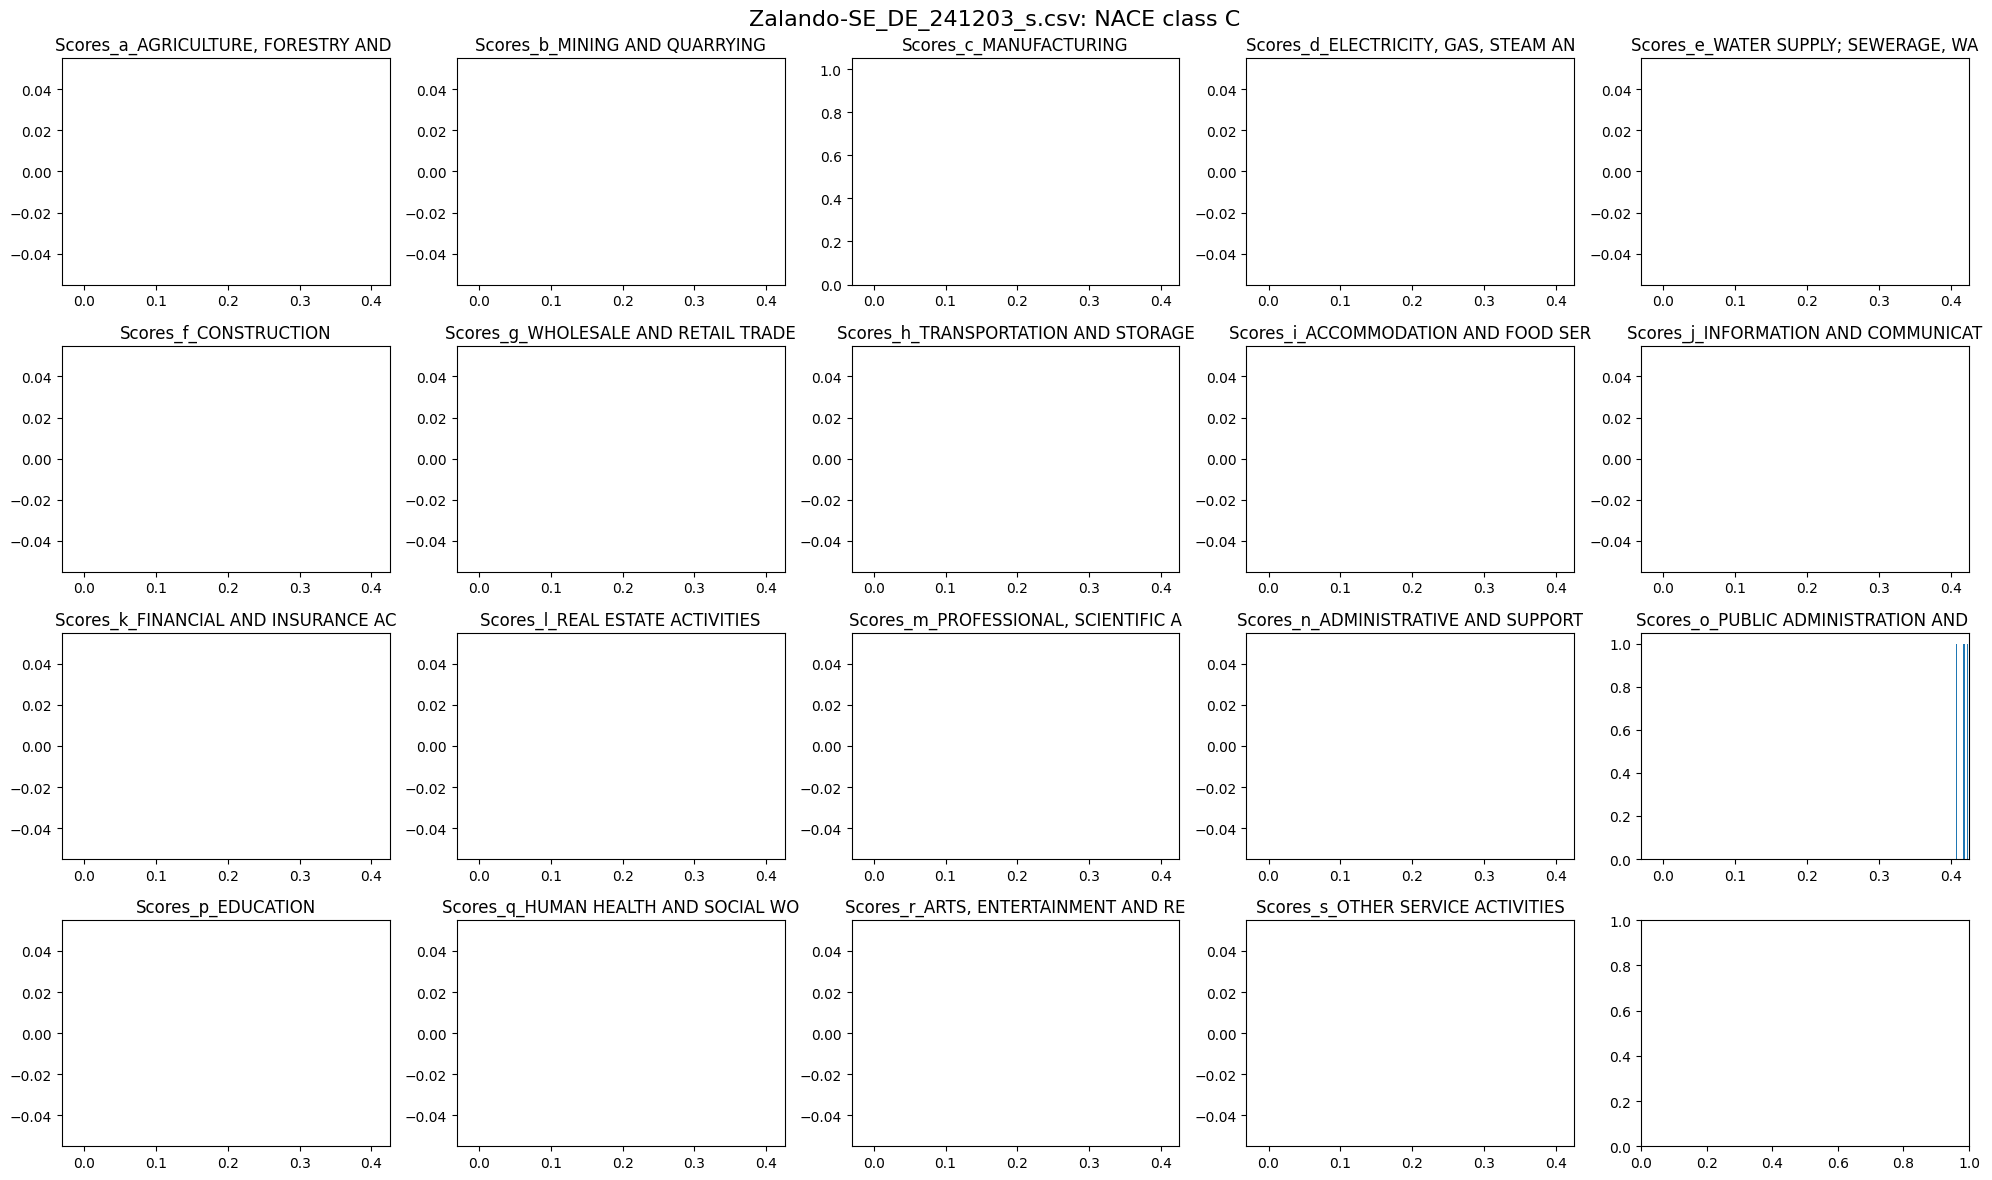

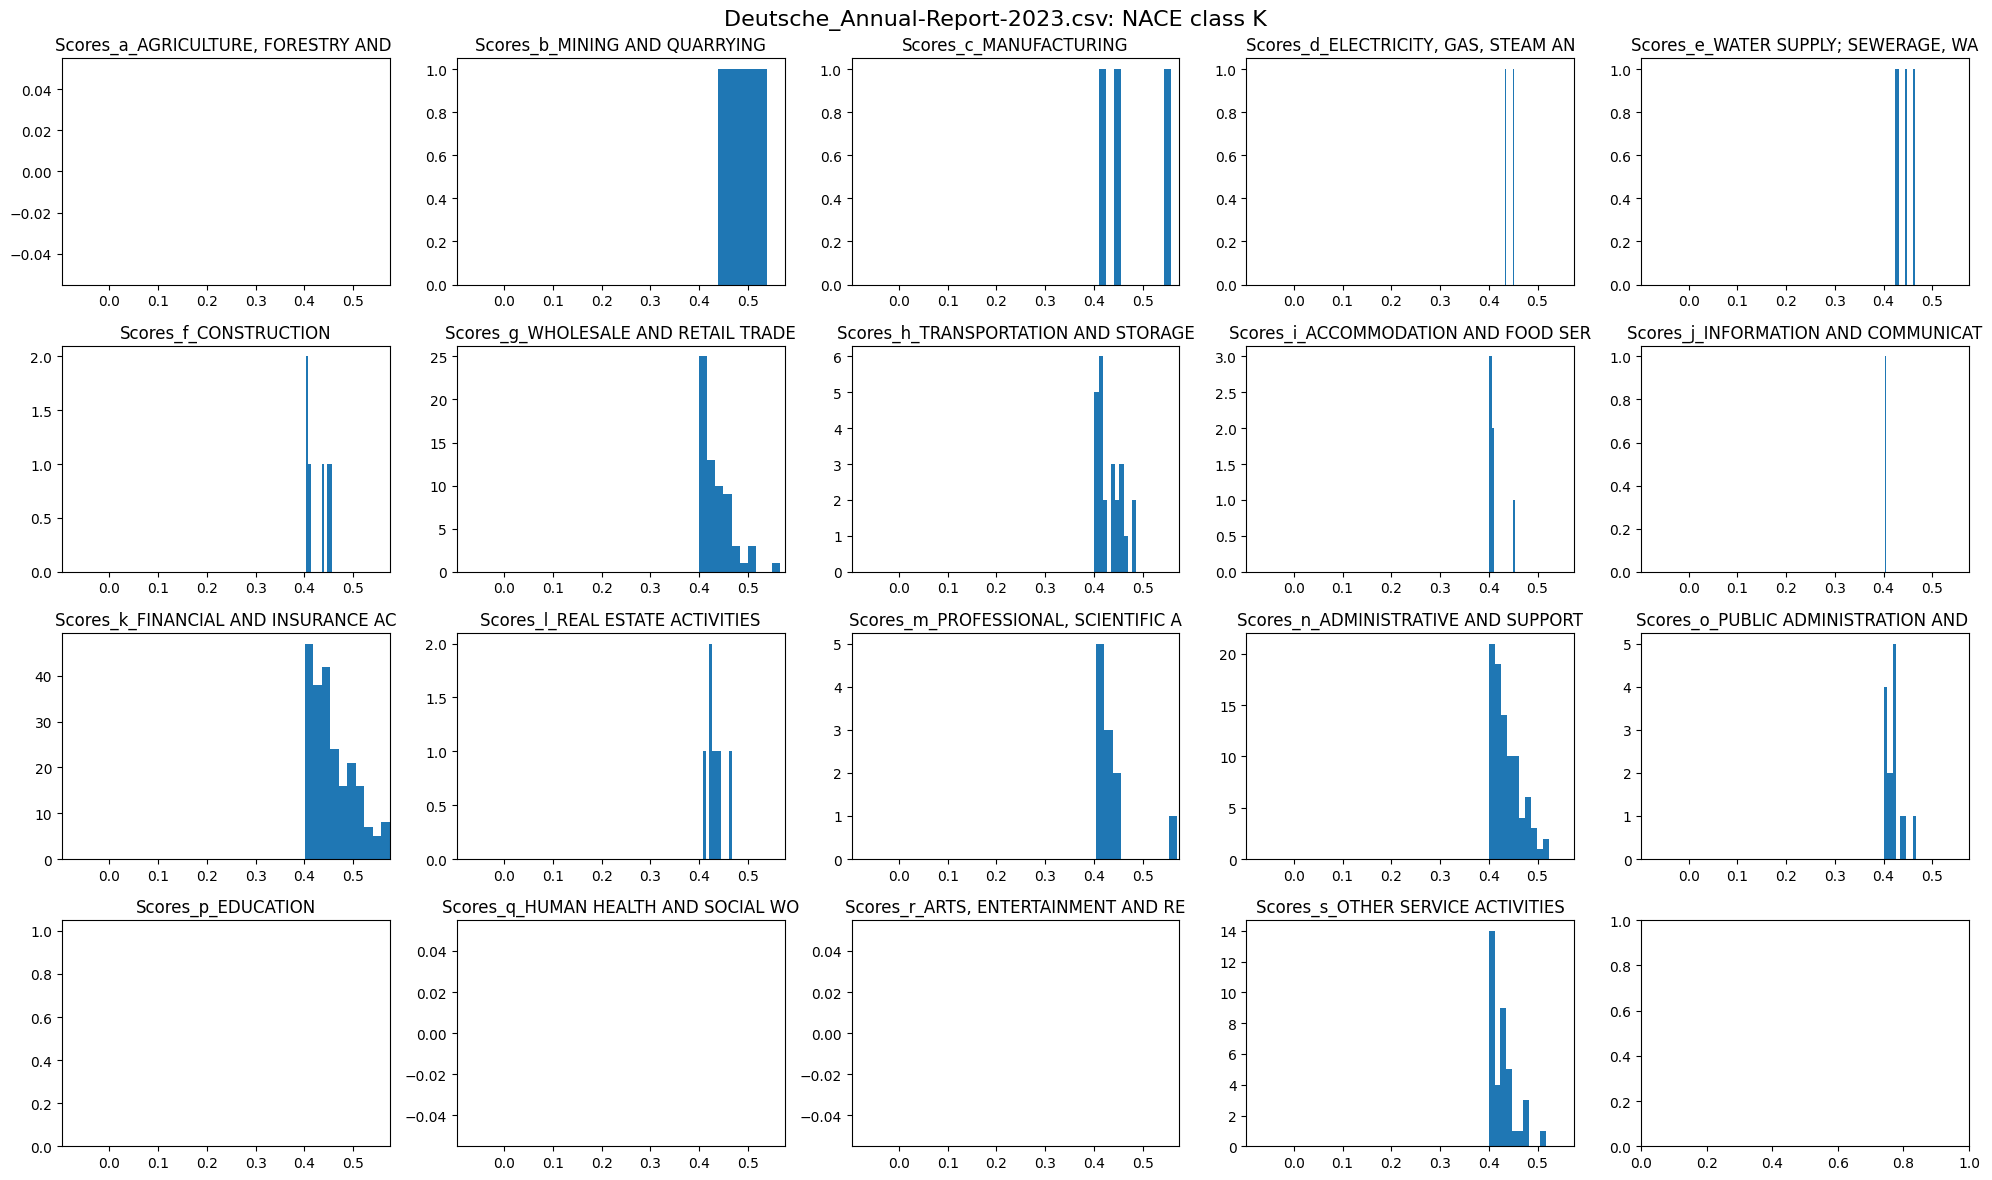

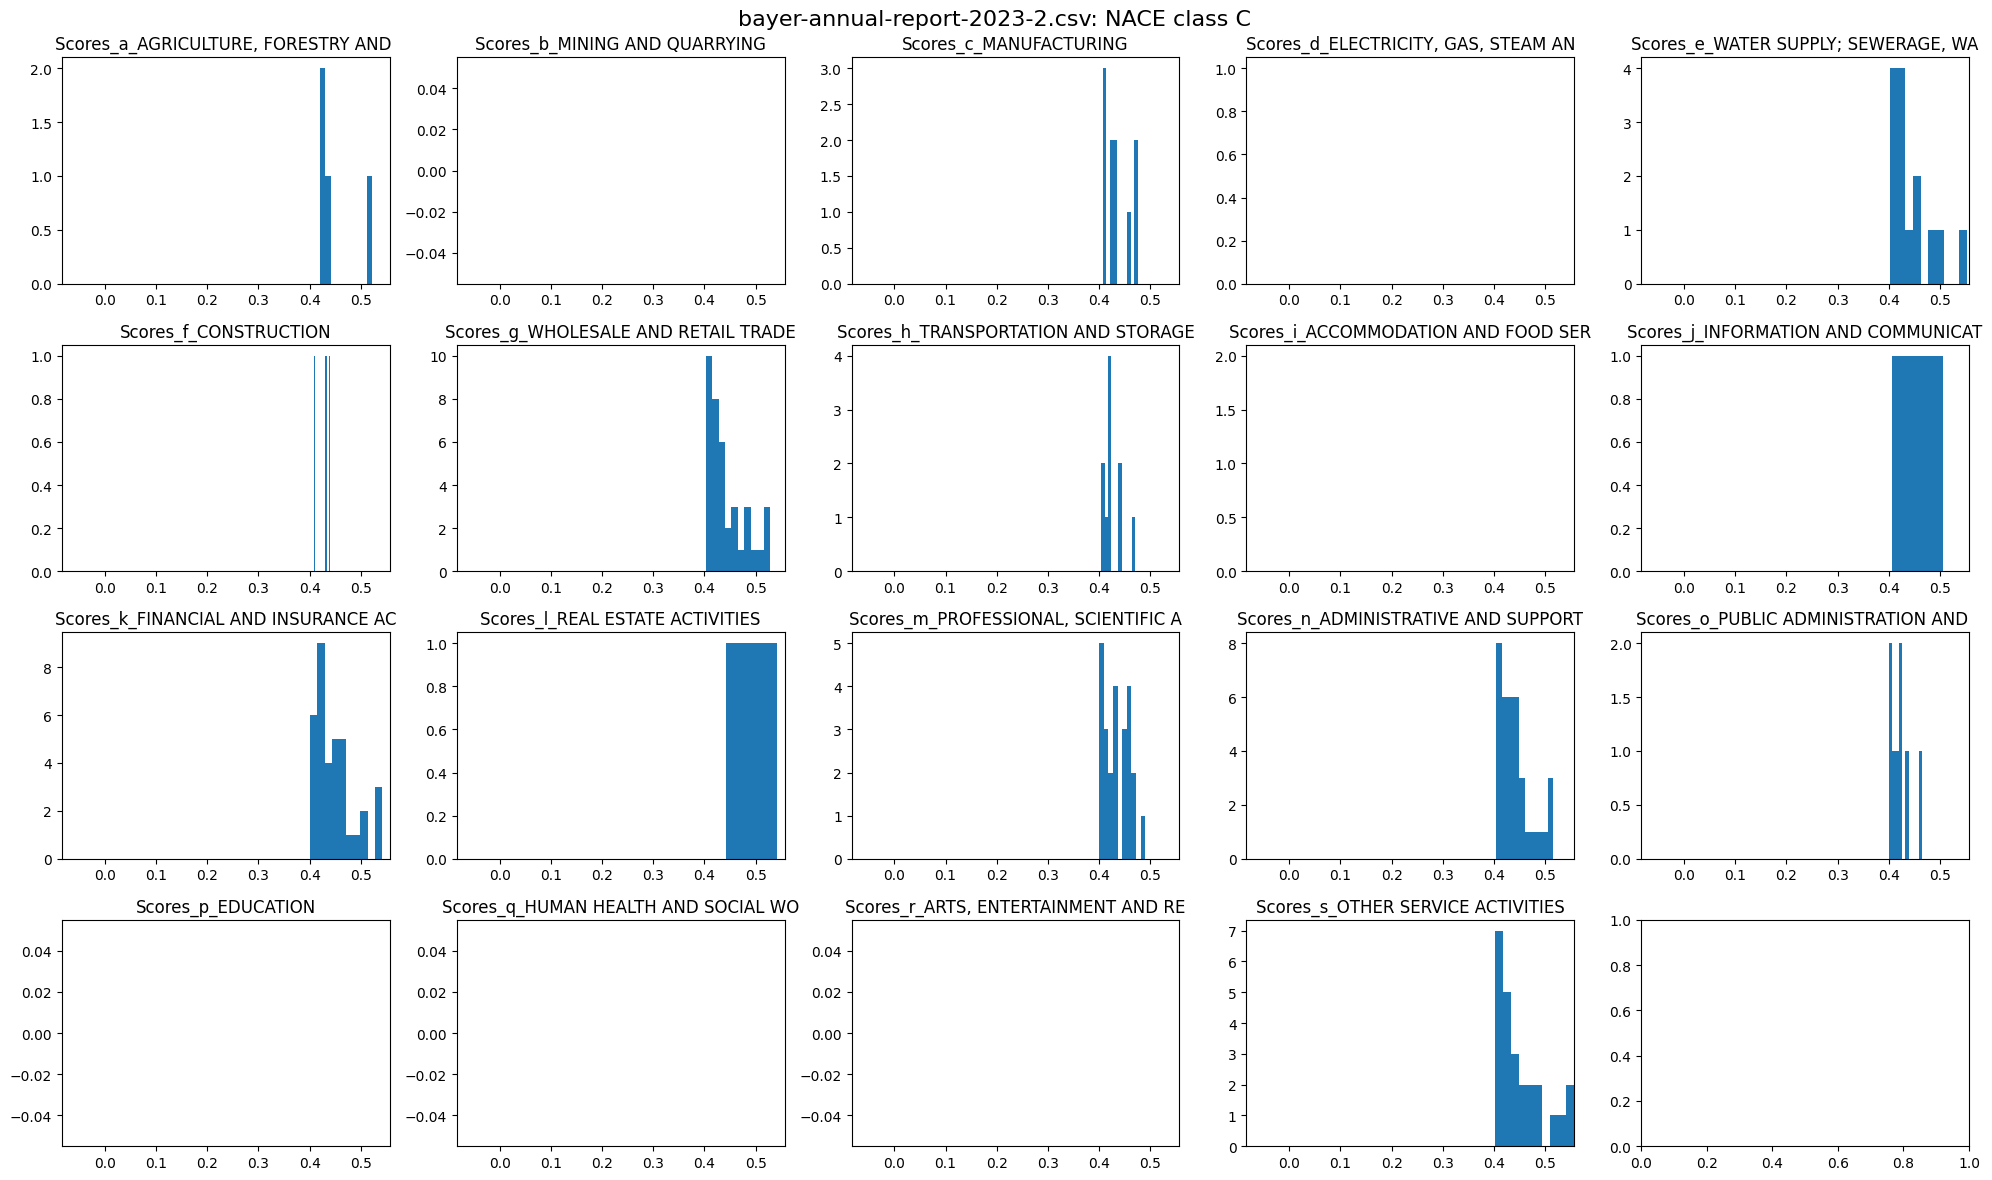

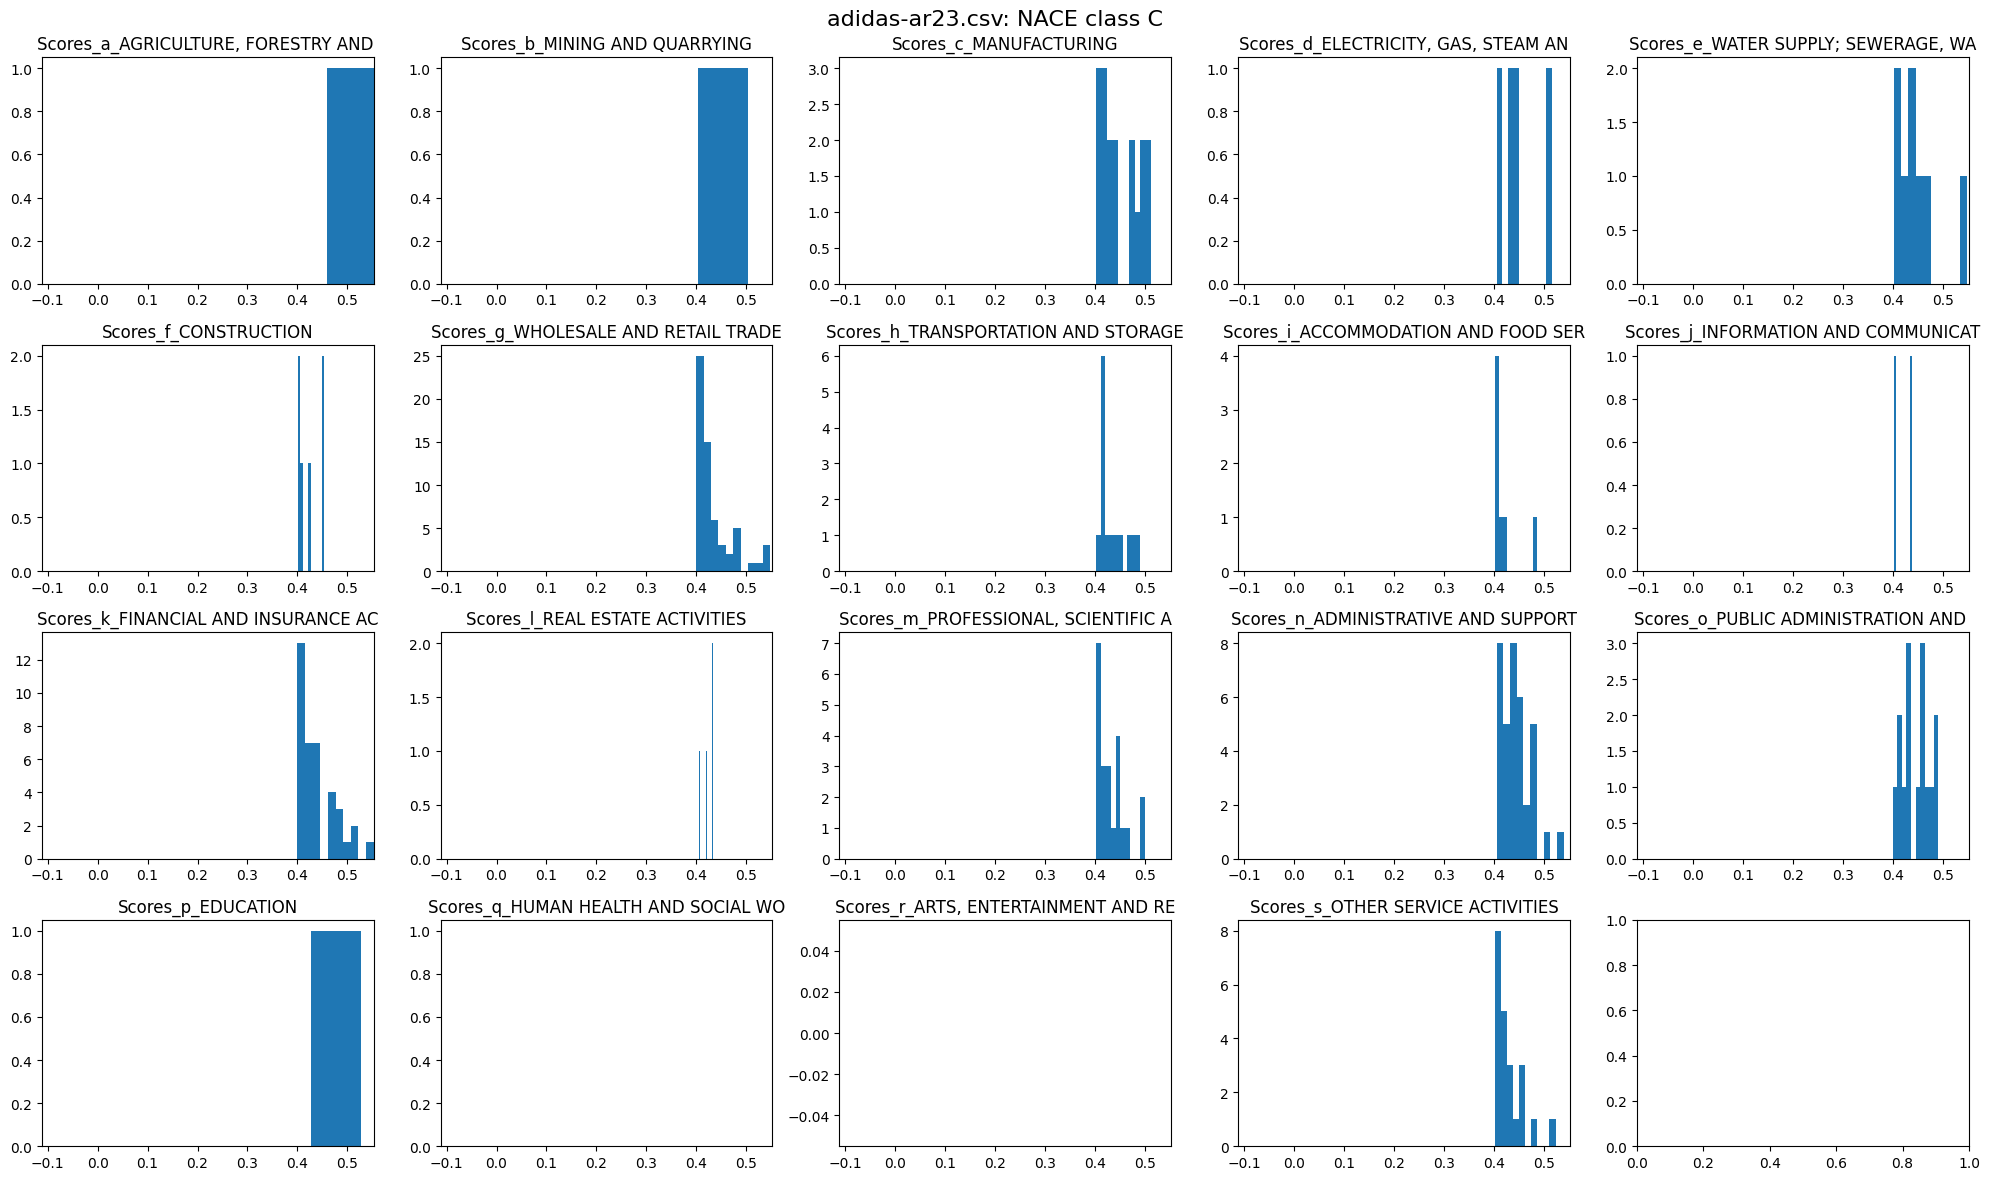

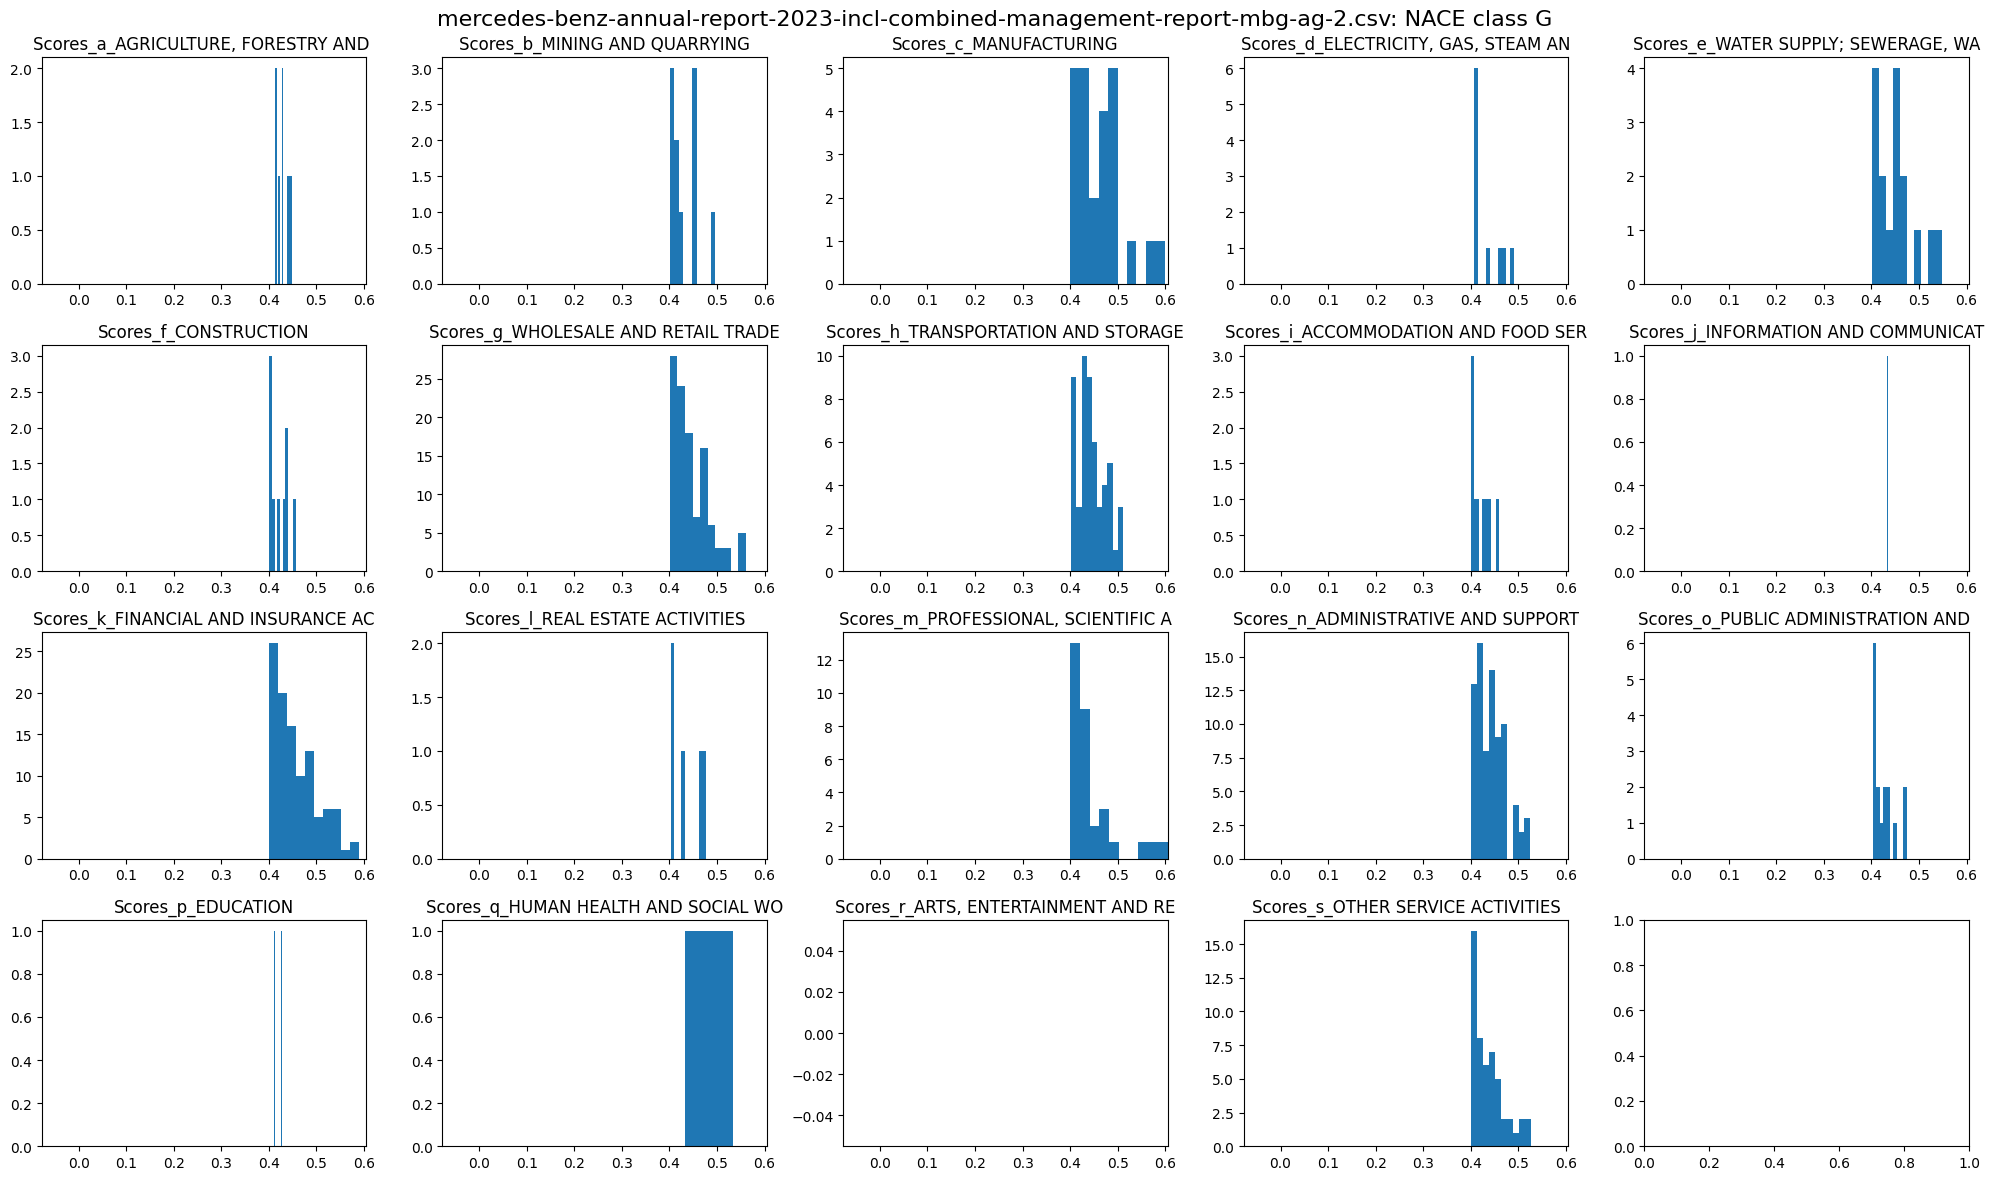

In [7]:
for j in range(len(df_paragraph_similarities)):
    fig, axes = plt.subplots(4, 5, figsize=(20, 12))
    axes = axes.flatten()

    min_x = df_paragraph_similarities[j][1].iloc[:,3:].min().min()
    max_x = df_paragraph_similarities[j][1].iloc[:,3:].max().max()

    for i in range(19):
        axes[i].hist(df_paragraph_similarities[j][1].iloc[:,3+i][df_paragraph_similarities[j][1].iloc[:,3+i] > cos_threshold])
        axes[i].set_title(df_paragraph_similarities[j][1].iloc[:,3+i].name[:35])
        axes[i].set_xlim([min_x, max_x])

    fig.suptitle(f"{df_paragraph_similarities[j][0]}.csv: NACE class {NACE_codes[df_paragraph_similarities[j][0]+'.csv']}", fontsize=16)
    plt.tight_layout()
    plt.show()

In [8]:
print(df_paragraph_similarities[0][0])
print(df_paragraph_similarities[0][1].iloc[:, [1, 5]].sort_values(df_paragraph_similarities[0][1].columns[5], ascending=False).iloc[1]["Paragraphs"])

rheinmetall-ag_2023
letter to sharehold ers combined management report  consolidated financial statement  further information  
 non financial aspects of business activities    
 eu taxonomy    
rheinmetall annual report     requirement that the economic activity produces technologies for renewable energies. in this respect it is our 
understanding that no separate proof is required fo r this if taxonomy eligibility has already been proven.  
manufacture of equipment for the production and use of hydrogen ..  
with its current hydrogen product portfolio including recirculation blowers high voltage pumps or hydrogen 
cathode valves distri buted by pierburg gmbh rheinmetall offers technologies for the use of hydrogen which is 
why we see ourselves as an enabling company. the substantial contribution for the manufacture of technologies 
for the use of hydrogen does not deviate from the requir ements for taxonomy eligibility. in this respect no separate 
verification was required.  
manufa